W pliku **wbo_lista_glosow_2019.csv** znajdziesz dane o głosach oddanych w ramach Wrocławskiego Budżetu Obywatelskiego, pobrane ze strony [Wrocław Otwarte Dane](https://www.wroclaw.pl/open-data/dataset/wroclawski-budzet-obywatelski-glosowanie).

Odczytaj te dane i wyświetl histogram wieku głosujących - wyświetl słupki obejmujące 5-letnie zakresy: głosujący w wieku od 18 do 23 lat, od 24 do 28 lat, itd (do 100 lat - zakładamy że jest to maksymalny wiek głosujących).

In [45]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [46]:
df = pd.read_csv(os.path.join("..", "01_Dane do wykresów", "wbo_lista_glosow_2019.csv"), sep=";")

In [47]:
df.head()

,Lp,Data,Wiek,Plec,Kod_Pocztowy,Zrodlo,Osiedlowy,Ponadosiedlowy
0,1,"9:01:21, 20-09-2019",33,K,54-117,I,256,132
1,2,"9:01:32, 20-09-2019",38,K,54-131,I,323,255
2,3,"9:02:28, 20-09-2019",32,K,54-107,I,256,132
3,4,"9:02:44, 20-09-2019",36,M,53-339,I,4,5
4,5,"9:02:51, 20-09-2019",31,M,50-231,I,108,120


In [48]:
df.sample(10)

,Lp,Data,Wiek,Plec,Kod_Pocztowy,Zrodlo,Osiedlowy,Ponadosiedlowy
22493,22494,"20:16:33, 24-09-2019",26,K,53-643,I,30,181
67735,67736,"9:05:32, 07-10-2019",45,M,53-024,I,64,350
73383,73384,"17:17:27, 07-10-2019",67,K,54-020,I,167,250
55242,55243,"19:39:29, 05-10-2019",41,K,51-680,I,371,134
50,51,"9:08:37, 20-09-2019",29,K,50-537,I,70,129
49248,49249,"9:21:45, 04-10-2019",6,M,52-425,I,366,234
73978,73979,"18:10:03, 07-10-2019",31,M,54-608,I,240,250
44890,44891,"19:56:43, 02-10-2019",24,K,53-615,I,371,85
18571,18572,"18:42:11, 23-09-2019",61,K,50-033,I,336,0
20865,20866,"11:50:01, 24-09-2019",58,K,54-144,I,323,255


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83011 entries, 0 to 83010
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lp              83011 non-null  int64 
 1   Data            83011 non-null  object
 2   Wiek            83011 non-null  int64 
 3   Plec            83011 non-null  object
 4   Kod_Pocztowy    83009 non-null  object
 5   Zrodlo          83011 non-null  object
 6   Osiedlowy       83011 non-null  int64 
 7   Ponadosiedlowy  83011 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.1+ MB


#### z powyższego wynika, że są missingi: kod pocztowy ma 2 braki, więc robimy df.describe

In [50]:
df.describe()

,Lp,Wiek,Osiedlowy,Ponadosiedlowy
count,83011.000000,83011.000000,83011.000000,83011.000000
mean,41506.000000,34.631025,203.413403,169.867548
std,23963.355935,18.247531,135.225674,134.173157
min,1.000000,0.000000,0.000000,0.000000
25%,20753.500000,25.000000,88.000000,18.000000
50%,41506.000000,34.000000,215.000000,151.000000
75%,62258.500000,43.000000,309.000000,275.000000
max,83011.000000,175.000000,447.000000,438.000000


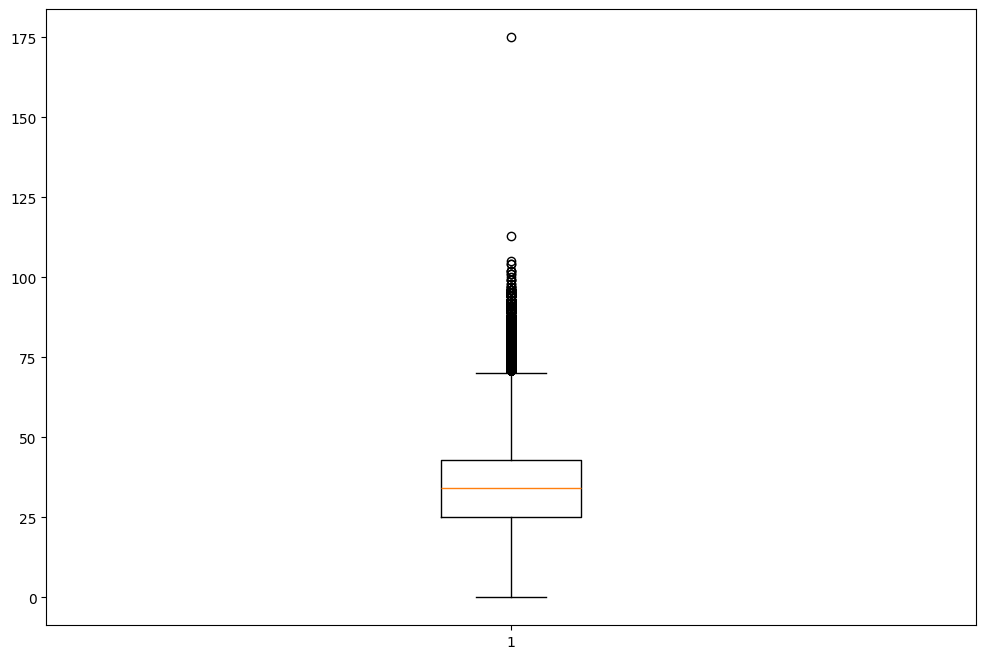

In [51]:
    # sprawdzam jak się wstępnie rozkładają dane

fig, ax = plt.subplots(figsize=(12, 8))

ax.boxplot(df["Wiek"])
plt.show()

In [52]:
    # na powyższym wykresie widać, że outlayer wartość odstająca 175 i z nią coś jest nie tak, więc szukamy jej:

df.loc[df["Wiek"] > 100]

,Lp,Data,Wiek,Plec,Kod_Pocztowy,Zrodlo,Osiedlowy,Ponadosiedlowy
8752,8753,"11:01:56, 21-09-2019",102,K,54-131,I,323,255
13646,13647,"15:43:22, 22-09-2019",175,M,53-331,I,269,132
31017,31018,"7:45:06, 28-09-2019",104,M,53-004,I,170,151
35301,35302,"19:24:41, 29-09-2019",102,M,54-129,I,100,230
40664,40665,"13:33:15, 01-10-2019",104,K,50-315,I,98,62
42850,42851,"8:31:29, 02-10-2019",113,M,53-224,I,442,396
59168,59169,"15:06:05, 06-10-2019",105,M,50-505,I,4,5
62530,62531,"19:56:06, 06-10-2019",102,M,54-134,I,323,255
80669,80670,"22:24:24, 07-10-2019",101,K,51-211,I,320,8
81675,81676,"22:57:49, 07-10-2019",101,K,54-150,I,266,164


In [53]:
    # teraz wezmę sobie przedział wiekowy który nas interesuje:
# df.loc[np.logical_and()]

df = df.loc[(df["Wiek"] <= 100) & (df["Wiek"] >=18 )]

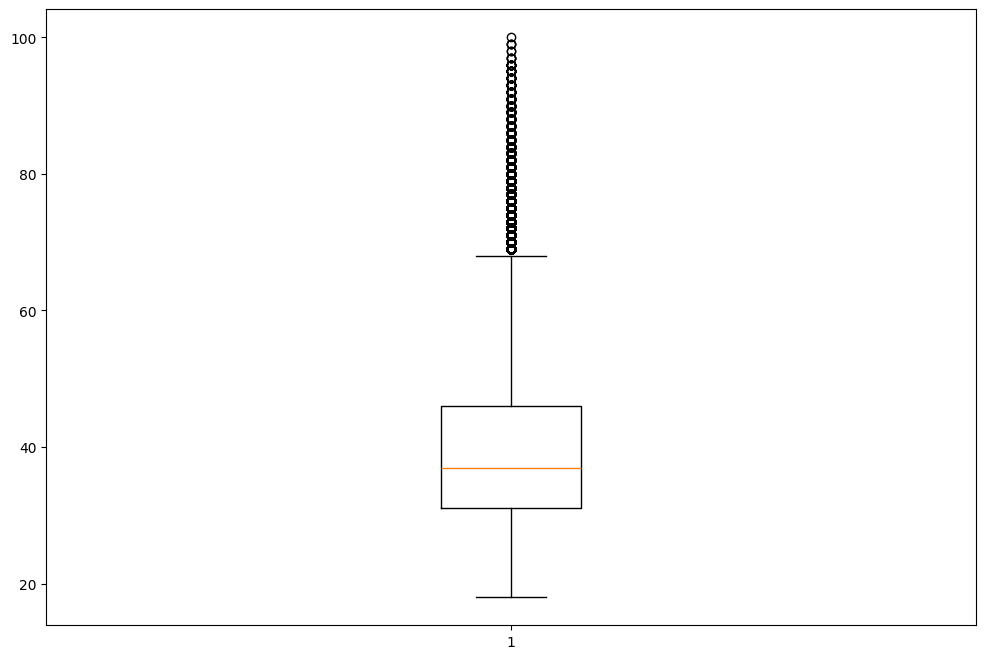

In [54]:
    # teraz zobaczę co się stanie jak obcięte zostały te wartości

fig, ax = plt.subplots(figsize=(12, 8))

ax.boxplot(df["Wiek"])
plt.show()

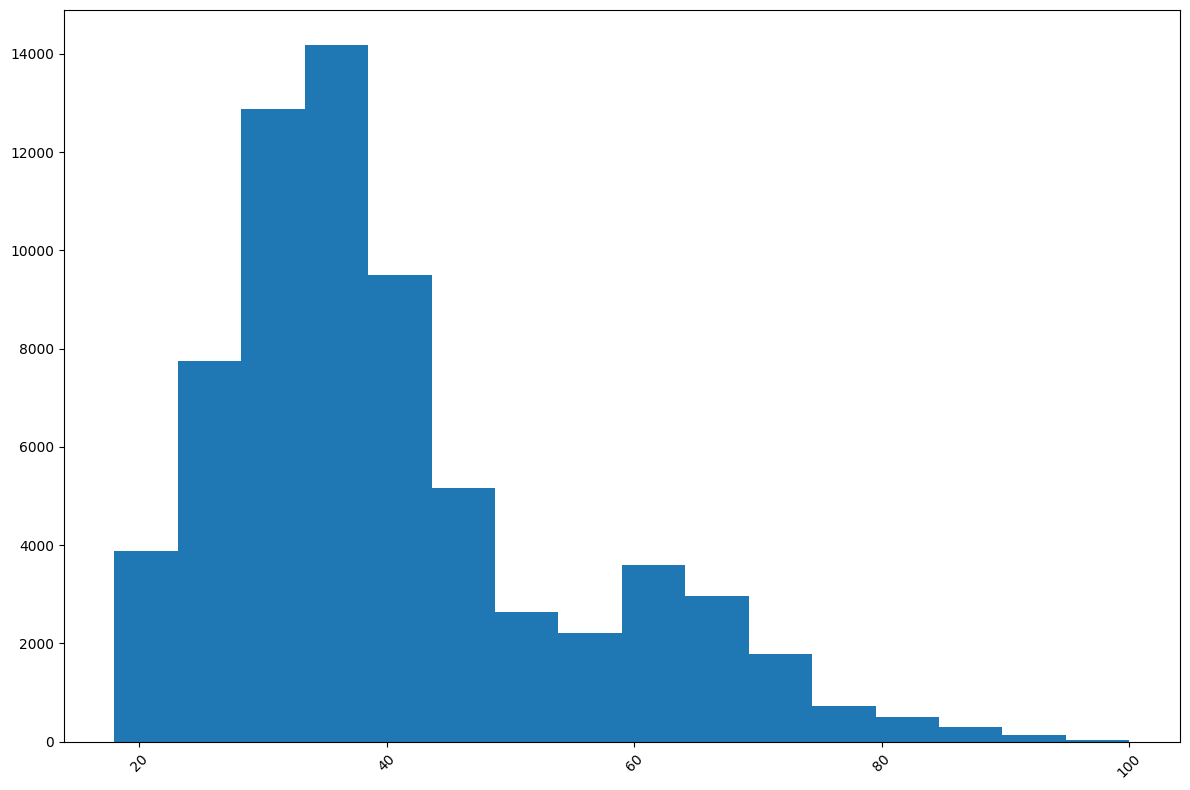

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

# wzór ile ma być "koszyków" w zbiorze czyli tych przedziałów na osi
bins = range(18, 100, 5)


ax.hist(df["Wiek"], bins=16)







plt.xticks(rotation=45)

plt.tight_layout()
plt.show()